In [ ]:
#CUDA_LAUNCH_BLOCKING=1

In [1]:
!pip install opendatasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch#torch as a built-in module, no need to install
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import os


In [4]:

od.download('https://www.kaggle.com/datasets/ahmedelsany/car-brand-classification-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Eundstgoldenorder
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ahmedelsany/car-brand-classification-dataset


100%|██████████| 177M/177M [00:00<00:00, 846MB/s] 


In [5]:


# Define transformations to apply to the images
# This typically includes resizing, cropping, and normalization
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the dataset using ImageFolder
# Replace 'path/to/your/data' with the actual path to your main data directory
train_dataset = datasets.ImageFolder('/content/car-brand-classification-dataset/Car Brand Classification Dataset/train/', transform=transform)

# Access class names and their corresponding indices
print(train_dataset.classes)  # List of class names (folder names)
print(train_dataset.class_to_idx) # Dictionary mapping class names to integer labels

# Create a DataLoader for batching and shuffling
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# Example of iterating through the DataLoader
for images, labels in train_loader:
    # images is a batch of image tensors
    # labels is a batch of corresponding integer class labels
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels: {labels}")


    break # Process one batch for demonstration

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']
{'Acura': 0, 'Aston Martin': 1, 'Audi': 2, 'BMW': 3, 'Bentley': 4, 'Buick': 5, 'Cadillac': 6, 'Chevrolet': 7, 'Chrysler': 8, 'Dodge': 9, 'FIAT': 10, 'Ford': 11, 'GMC': 12, 'Honda': 13, 'Hyundai': 14, 'INFINITI': 15, 'Jaguar': 16, 'Jeep': 17, 'Kia': 18, 'Land Rover': 19, 'Lexus': 20, 'Lincoln': 21, 'MINI': 22, 'Mazda': 23, 'Mercedes-Benz': 24, 'Mitsubishi': 25, 'Nissan': 26, 'Porsche': 27, 'Ram': 28, 'Subaru': 29, 'Toyota': 30, 'Volkswagen': 31, 'Volvo': 32}
Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels: tensor([ 9,  5, 23, 23, 19, 21, 25, 16, 21, 18,  0,  2, 21, 14,  3, 14, 15, 24,
        31, 15, 16, 13, 19,  1, 20,  0, 15, 22, 

AI Overview
To view images loaded by a PyTorch DataLoader, follow these steps: Iterate through the DataLoader.
Obtain a batch of data from the DataLoader using next(iter(dataloader)) or by looping through the DataLoader. Each iteration yields a batch of images and their corresponding labels (or other data).

In [6]:

# Example: Load MNIST dataset
#transform = transforms.ToTensor()
#train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Get a batch of data
images, labels = next(iter(train_loader))


 Select an individual image from the batch:

Choose an image from the batch to display. The images in the batch will typically be in a tensor format (e.g., [batch_size, channels, height, width]).

In [7]:
# Select the first image in the batch
first_image = images[0]
first_label = labels[0]
'''
Prepare the image for visualization:

Remove the batch dimension (if present): If your image tensor still has a batch dimension of 1 (e.g., [1, channels, height, width]), use squteeze() to remove it.
Convert to NumPy array: Matplotlib's imshow function typically works with NumPy arrays. Convert the PyTorch tensor to a NumPy array using .cpu().numpy().
Transpose dimensions (if necessary): If the image tensor is in [channels, height, width] format, transpose it to [height, width, channels] for imshow. For grayscale images, [height, width] is sufficient
'''
# For grayscale images (like MNIST), squeeze removes the channel dimension
image_to_display = first_image.squeeze().cpu().numpy()
# For color images, you might need to permute dimensions:

image_to_display = first_image.permute(1, 2, 0).cpu().numpy()


Display the image using Matplotlib.
Use plt.imshow() to display the image and plt.title() or print() to show its label.


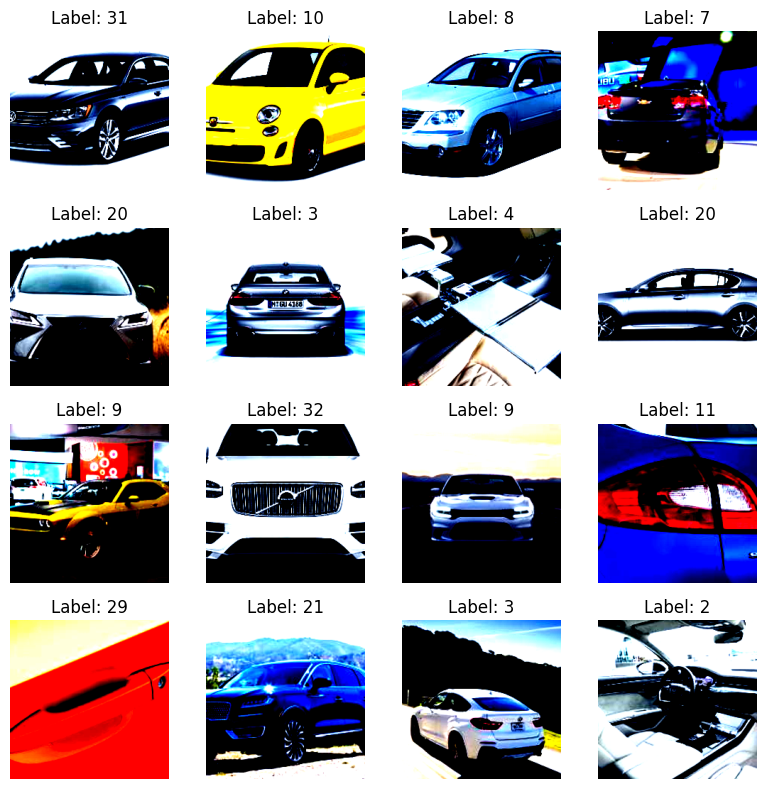

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    if i < len(images):
        img_display = images[i].squeeze().cpu().numpy()
        img_display = np.transpose(img_display, (1, 2, 0))
        #ax.imshow(img_display, cmap='gray')
        #ax.imshow(img_display)
        ax.imshow(img_display)
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Define transformations for the training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
'''
Use code with caution.
Step 3: Load data with ImageFolder
Now, use datasets.ImageFolder to load the data from your directory structure. PyTorch will automa
tically infer the labels from the folder names.
python
'''

data_dir = '/content/car-brand-classification-dataset/Car Brand Classification Dataset'

image_datasets = {x: datasets.ImageFolder(
    os.path.join(data_dir, x),
    data_transforms[x]
) for x in ['train', 'val']}

# The class names are automatically stored in the `classes` attribute
class_names = image_datasets['train'].classes
print(f"Class names: {class_names}")
# PyTorch also assigns an index to each class
print(f"Class to index mapping: {image_datasets['train'].class_to_idx}")

'''
Step 4: Create data loaders
Wrap the datasets in torch.utils.data.DataLoader to handle batching, shuffling, and loading the data in parallel
'''

from torch.utils.data import DataLoader

dataloaders = {x: DataLoader(
    image_datasets[x],
    batch_size=4,
    shuffle=True,
    num_workers=4
) for x in ['train', 'val']}

#Step 5: Build and train your model
#You can now proceed with building and training your model using the data loaders.
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import os

# Load a pre-trained ResNet model
model = models.resnet18(weights='IMAGENET1K_V1')
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(class_names))

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Simple training loop (for demonstration)
num_epochs = 5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    print(f'Epoch {epoch}/{num_epochs - 1}')
    for phase in ['train', 'val']:
        print(phase)
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print('Training complete')


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Class names: ['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo']
Class to index mapping: {'Acura': 0, 'Aston Martin': 1, 'Audi': 2, 'BMW': 3, 'Bentley': 4, 'Buick': 5, 'Cadillac': 6, 'Chevrolet': 7, 'Chrysler': 8, 'Dodge': 9, 'FIAT': 10, 'Ford': 11, 'GMC': 12, 'Honda': 13, 'Hyundai': 14, 'INFINITI': 15, 'Jaguar': 16, 'Jeep': 17, 'Kia': 18, 'Land Rover': 19, 'Lexus': 20, 'Lincoln': 21, 'MINI': 22, 'Mazda': 23, 'Mercedes-Benz': 24, 'Mitsubishi': 25, 'Nissan': 26, 'Porsche': 27, 'Ram': 28, 'Subaru': 29, 'Toyota': 30, 'Volkswagen': 31, 'Volvo': 32}
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 207MB/s]


Epoch 0/4
train
train Loss: 3.5557 Acc: 0.0730
val
val Loss: 3.3988 Acc: 0.1491
Epoch 1/4
train


KeyboardInterrupt: 

In [ ]:
model.eval()#change the model training into testing

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
test_dataset = datasets.ImageFolder('/content/car-brand-classification-dataset/Car Brand Classification Dataset/test/', transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [9]:
import torch.nn as nn



is_gpu = torch.cuda.is_available()

#transform = transforms.Compose([
    #transforms.ToTensor()
#])  # modification because origina model had pictures with same dimensions, new model has model with other dimensions. Which varies

newsize=224

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(newsize),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#train = datasets.MNIST('',train = True, download = True, transform=transform)
#test = datasets.MNIST('',train = False, download = True, transform=transform)
train = datasets.ImageFolder('/content/car-brand-classification-dataset/Car Brand Classification Dataset/train/', transform=transform)
test = datasets.ImageFolder('/content/car-brand-classification-dataset/Car Brand Classification Dataset/test/', transform=transform)

batch__size=32#allows flexiable


trainloader = DataLoader(train, batch_size= batch__size, shuffle=True)# The shuffle is for the program to learn without a bias, avoid any unwanted pattern. in sequence
testloader = DataLoader(test, batch_size= batch__size, shuffle=False)# In testing, there is no need to shuffle beause there is no effect on results.


model = nn.Sequential(nn.Flatten(),
                     #nn.Linear(28*28,512),
                     nn.Linear(newsize*newsize*3,512),#the reason to time 3 is because the picture have 3 colors.
                     nn.ReLU(),
                     #nn.Linear(512,256),
                     nn.Linear(512,256),
                     nn.ReLU(),
                     nn.Linear(256,10))

if is_gpu:
    model = model.cuda()

print(model)

num_classes = 32

#logits = torch.random(batch__size, num_classes)

#target_labels = torch.tensor()

import torch.optim as optim
criterion = nn.NLLLoss()
#optimizer = optim.SGD(model.parameters(),lr=0.7)
#optimizer = optim.Adam(net.parameters(), lr=1e-10)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

epochs = 5

for i in range(epochs):
    train_loss = 0.0
    for data,label in trainloader:
        if is_gpu:
            data, label = data.cuda(), label.cuda()
        optimizer.zero_grad()


        output = model(data)
        print(label.shape)
        print(output.shape)
        print(output.shape[0])
        output1=[output.shape[0]]
        output2=torch.tensor(output1)
        loss = criterion(output1,label)
        loss.backward()


        optimizer.step()

        train_loss += loss.item() * data.size(0)
    print(f'Epoch: {i+1} / {epochs} \t\t\t Training Loss:{train_loss/len(trainloader)}')

test_loss = 0.0
correct, total = 0,0

for data,label in testloader:
    if is_gpu:
        data, label = data.cuda(), label.cuda()
    output = model(data)
    for o,l in zip(torch.argmax(output,axis = 1),label):
        if o == l:
            correct += 1
        total += 1
    loss = criterion(output,label)
    test_loss += loss.item() * data.size(0)
print(f'Testing Loss:{test_loss/len(testloader)}')
print(f'Correct Predictions: {correct}/{total}')


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=150528, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)
torch.Size([32])
torch.Size([32, 10])
32


TypeError: nll_loss_nd(): argument 'input' (position 1) must be Tensor, not list